In [49]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os


in_file = os.path.join("Animal_Shelter_Final.csv")
final_df = pd.read_csv(in_file)
# final_df[final_df["color_primary"]=="Blue"].groupby("breed").count().sort_values("animal_id", ascending=False)
final_df.head(1)

,animal_id,name,datetime,found_location,type,intake_condition,sex,age,breed,color_primary,color_secondary,num_stays,avg_stay_len
0,A200922,Carlos,2013-10-03 15:47:00,Austin (TX),Owner Surrender,Normal,Neutered Male,16 years,Dachshund Mix,Black,Tan,1,49.0


In [53]:
avg_stay_length_total = final_df["avg_stay_len"].mean()
avg_num_stays_total = final_df["num_stays"].mean()
(avg_num_stays_total, avg_stay_length_total)

(1.1370510766344915, 25.089065334993272)

In [2]:
color_dict = {
    "Black":"#000000",
    "White":"#FFFFFF",
    "Brown":"#8B4513",
    "Tan":"#D2B48C",
    "Blue":"#B0C4DE",
    "Red":"#A52A2A",
    "Gray":"#808080",
    "Yellow":"#FAFAD2",
    "Tricolor":"#DCDCDC",
    "Pink":"#FF69B4"
}

In [8]:
avg_stay_by_color = final_df.groupby("color_primary").mean().sort_values("avg_stay_len", ascending=False)
num_stay_by_color = final_df.groupby("color_primary").count()

avg_stay_by_color_2nd = final_df.groupby("color_secondary").mean()
num_stay_by_color_2nd = final_df.groupby("color_secondary").count()

color_order = list(avg_stay_by_color.index) + ["Pink"]

In [9]:
def weighted_by_color(stay_len, num_dogs, total_dogs, scale = 1):
    return scale*stay_len*num_dogs/total_dogs

In [10]:
# determine scale factor

def get_scale_factor(stay_df, num_df, colors, total_dogs):

    max_len_stay = stay_df["avg_stay_len"].max()

    max_len_stay_weighted = []
    for color in colors:
        max_len_stay_weighted.append(
            weighted_by_color(
                stay_df.loc[color]["avg_stay_len"], 
                num_df.loc[color]["avg_stay_len"], 
                total_dogs
            )
        )
    
    return max_len_stay/max(max_len_stay_weighted)

scale_factor_primary = get_scale_factor(avg_stay_by_color, num_stay_by_color, color_order[:-1], len(final_df))
scale_factor_secondary = get_scale_factor(avg_stay_by_color_2nd, num_stay_by_color_2nd, color_order[:-1], len(final_df))

In [12]:
def plot_bars(df, ax, color_order, color_dict, weighted=False,*, num_df=[], total_dogs=[], scale_factor=1):   
    
    if weighted:
        
        for color in color_order:
        
            if color == "Tricolor": 
                plt.rcParams["hatch.linewidth"] = 5
                plt.rcParams['hatch.color'] = "#CD853F"
                ax.bar(color,
                       weighted_by_color(df.loc[color]["avg_stay_len"], num_df.loc[color]["avg_stay_len"], total_dogs, scale=scale_factor),
                       color = color_dict[color], 
                       hatch="//", 
                       linewidth=2, 
                       ecolor=color_dict["Black"]
                      )
        
            elif color == "White":
                ax.bar(color, 
                       weighted_by_color(df.loc[color]["avg_stay_len"], num_df.loc[color]["avg_stay_len"], total_dogs, scale=scale_factor),
                       color = color_dict[color], 
                       edgecolor=color_dict["Black"]
                      )
                
            else:
                try:
                    ax.bar(color,
                           weighted_by_color(df.loc[color]["avg_stay_len"], num_df.loc[color]["avg_stay_len"], total_dogs, scale=scale_factor),
                           color = color_dict[color], 
                           edgecolor=color_dict["Black"]
                          )
                except KeyError:
                    ax.bar(color,
                           0,
                           color = color_dict[color], 
                           edgecolor=color_dict["Black"]
                          )
    
    else:
        for color in color_order:
        
            if color == "Tricolor": 
                plt.rcParams["hatch.linewidth"] = 5
                plt.rcParams['hatch.color'] = "#CD853F"
                ax.bar(color, 
                       df.loc[color]["avg_stay_len"],
                       color = color_dict[color], 
                       hatch="//", 
                       linewidth=2, 
                       ecolor=color_dict["Black"]
                      )
        
            elif color == "White":
                ax.bar(color, 
                       df.loc[color]["avg_stay_len"],
                       color = color_dict[color], 
                       edgecolor=color_dict["Black"]
                      )
                
            else:
                try:
                    ax.bar(color, 
                           df.loc[color]["avg_stay_len"],
                           color = color_dict[color], 
                           edgecolor=color_dict["Black"]
                          )
                except KeyError:
                    ax.bar(color, 
                           0,
                           color = color_dict[color], 
                           edgecolor=color_dict["Black"]
                          )

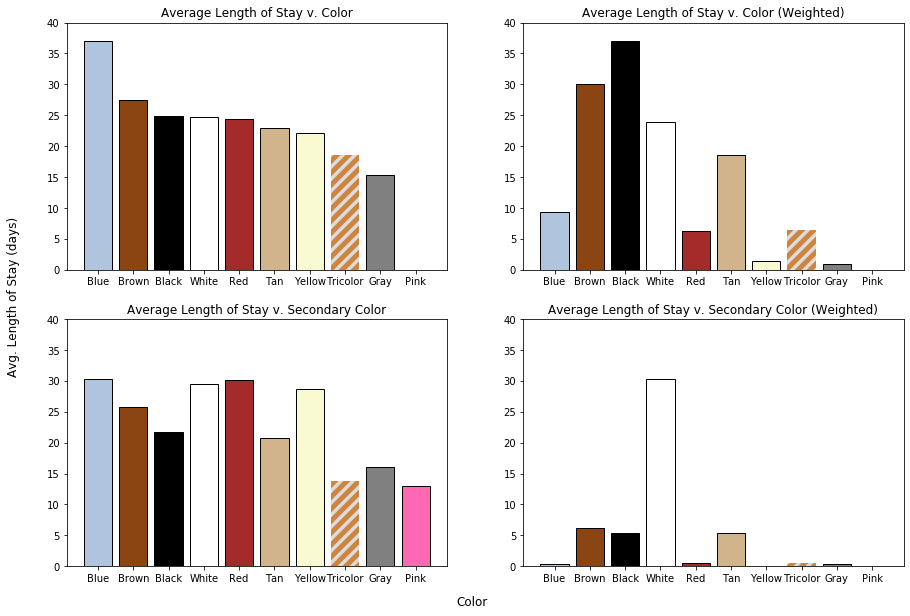

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(15, 10))
ylim=[0, 40]
ylim_weighted = [0, 12]

fig.text(0.5, 0.07, 'Color', ha='center', fontsize=12)
fig.text(0.07, 0.5, 'Avg. Length of Stay (days)', va='center', rotation='vertical', fontsize=12)

ax1[0].set_title("Average Length of Stay v. Color")
ax1[0].set_ylim(ylim)
plot_bars(avg_stay_by_color, ax1[0], color_order, color_dict)

ax1[1].set_title("Average Length of Stay v. Color (Weighted)")
ax1[1].set_ylim(ylim)
plot_bars(avg_stay_by_color, ax1[1], color_order, color_dict, weighted=True, num_df=num_stay_by_color, total_dogs=len(final_df), scale_factor=scale_factor_primary)

ax2[0].set_title("Average Length of Stay v. Secondary Color")
ax2[0].set_ylim(ylim)
plot_bars(avg_stay_by_color_2nd, ax2[0], color_order, color_dict)

ax2[1].set_title("Average Length of Stay v. Secondary Color (Weighted)")
ax2[1].set_ylim(ylim)
plot_bars(avg_stay_by_color_2nd, ax2[1], color_order, color_dict, weighted=True, num_df=num_stay_by_color_2nd, total_dogs=len(final_df), scale_factor=scale_factor_secondary)

plt.savefig("AvgLenStayByColor.png", dpi=300)

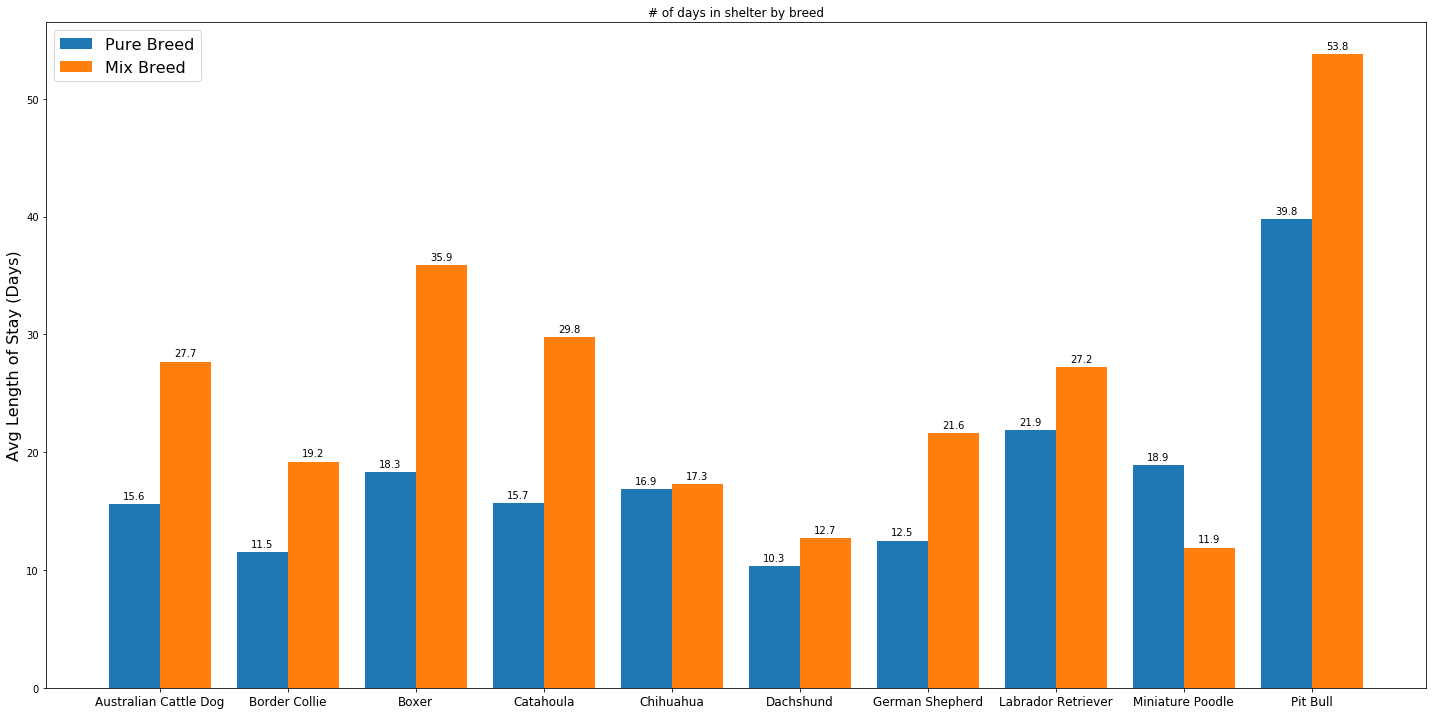

In [27]:
labels = ['Australian Cattle Dog', 'Border Collie', 'Boxer', 
          'Catahoula', 'Chihuahua', "Dachshund", "German Shepherd",
          "Labrador Retriever", "Miniature Poodle", "Pit Bull"]
pure_stay = [15.6, 11.5, 18.3, 15.7, 16.9, 10.3, 12.5, 21.9, 18.9, 39.8]
mix_stay = [27.7, 19.2, 35.9, 29.8, 17.3, 12.7, 21.6, 27.2, 11.9, 53.8]

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, pure_stay, width, label='Pure Breed')
rects2 = ax.bar(x + width/2, mix_stay, width, label='Mix Breed')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Avg Length of Stay (Days)', fontsize=16)
ax.set_title('# of days in shelter by breed')
plt.tight_layout()
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend(fontsize=16)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.rcParams["figure.figsize"]=(20,10)
plt.savefig("NumberOfDaysInShelterByBreed.png")
plt.show()

In [17]:
def convert_age_to_num(age_string):
    year=0
    if age_string.endswith("months"):
        year = 1
    else:
        year = int(age_string.split(" ")[0])
    return year
        
final_df["age"] = final_df["age"].apply(convert_age_to_num)

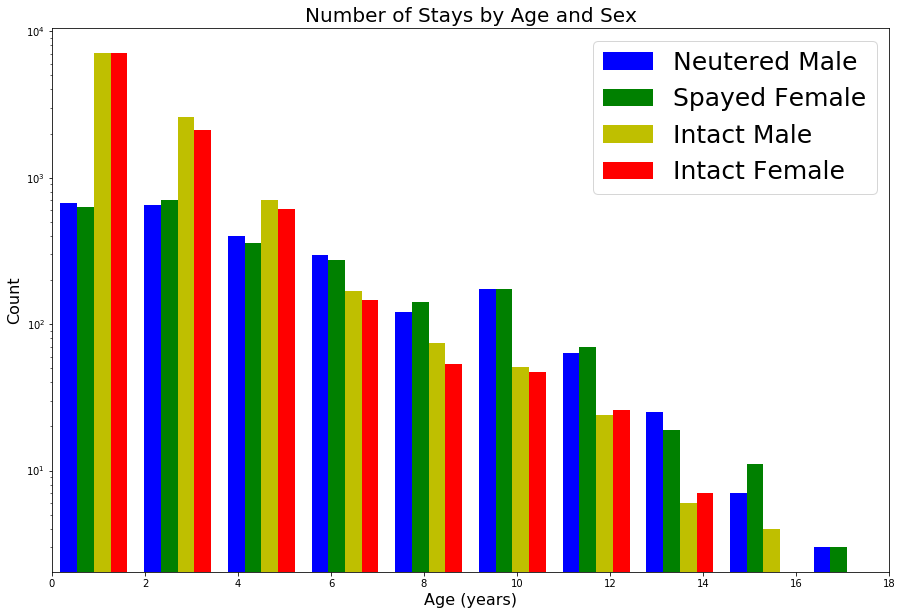

In [48]:
y1 = final_df.loc[final_df.sex == 'Neutered Male', "age" ]
y2 = final_df.loc[final_df.sex == 'Spayed Female', "age"] 
y3 = final_df.loc[final_df.sex == 'Intact Male', 'age']
y4 = final_df.loc[final_df.sex == 'Intact Female', 'age']
colors = ['b','g', 'y','r']
#plots the histogram
fig, ax1 = plt.subplots()
ax1.hist([y1, y2, y3,y4],color=colors, label=['Neutered Male', 'Spayed Female', 'Intact Male', 'Intact Female'])
plt.yscale("log")
ax1.set_xlim(0,18)
plt.ylabel("Count", fontsize=16)
plt.xlabel("Age (years)", fontsize=16)
plt.title("Number of Stays by Age and Sex", fontsize=20)

plt.legend(prop={"size":25})
fig2 = plt.gcf()

fig2.set_size_inches(15, 10)
fig2.savefig('StaysByAgeSex.png', dpi=300)
plt.show()